## Credit Card Fraud Detection – Anomaly Detection Baseline

Goal: Detect fraudulent transactions in highly imbalanced data using unsupervised methods (Isolation Forest).

Dataset: Kaggle Credit Card Fraud (284k txns, ~0.17% fraud).

Why Isolation Forest? Fast, effective for high-dimensional anomalies, no need for labeled training like supervised models





In [33]:
# Cell 2 (Code – Imports & Load Data)

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.ensemble import IsolationForest

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc

from sklearn.model_selection import train_test_split



# Load dataset (download from Kaggle & upload to Colab, or use direct link if public)

# For Colab: upload creditcard.csv or use !wget if you have a direct URL

# Example: df = pd.read_csv('/content/creditcard.csv')



df = pd.read_csv('/content/creditcard.csv') # Adjust path after upload

print("Dataset shape:", df.shape)

print("Fraud rate:", df['Class'].mean() * 100, "%")



df.head()


Dataset shape: (284807, 31)
Fraud rate: 0.1727485630620034 %


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class distribution:
 Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


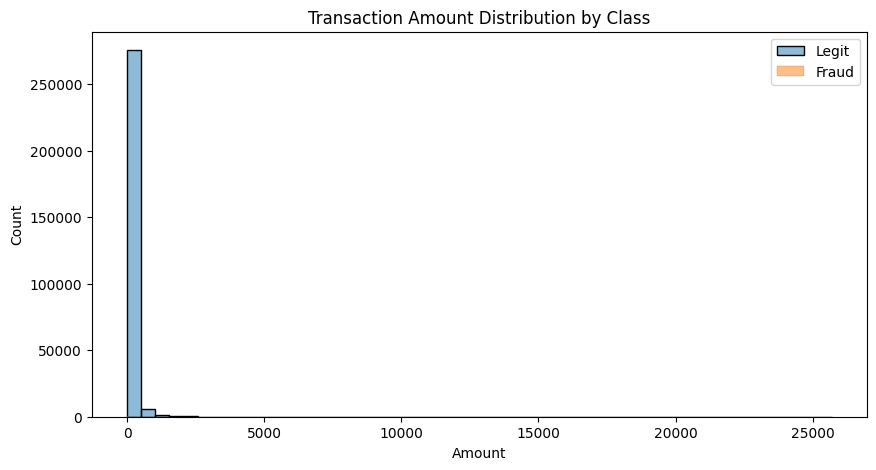

In [34]:
# Cell 3 (Code – Quick EDA)


# Basic overview
print("Missing values:\n", df.isnull().sum())
print("\nClass distribution:\n", df['Class'].value_counts(normalize=True))

# Amount distribution by class
plt.figure(figsize=(10,5))
sns.histplot(df[df['Class']==0]['Amount'], bins=50, label='Legit', alpha=0.5)
sns.histplot(df[df['Class']==1]['Amount'], bins=50, label='Fraud', alpha=0.5)
plt.legend()
plt.title('Transaction Amount Distribution by Class')
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.28      0.28      0.28       492

    accuracy                           1.00    284807
   macro avg       0.64      0.64      0.64    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
 [[283964    351]
 [   353    139]]
PR-AUC: 0.1685466476999123


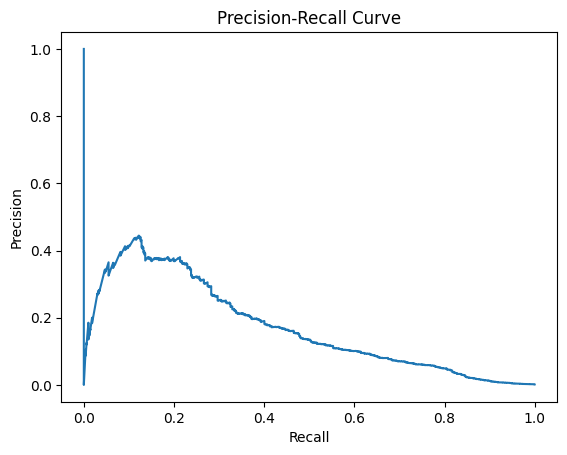

In [35]:
# Cell 4 (Code – Isolation Forest Model)

# Features (drop Time/Class for unsupervised)
X = df.drop(['Class', 'Time'], axis=1)  # Or keep Time if useful
y_true = df['Class']

# Train Isolation Forest (contamination = expected fraud rate)
model = IsolationForest(contamination=0.00172, random_state=42)  # ~fraud rate
model.fit(X)

# Predict: -1 = anomaly (fraud), 1 = normal
y_pred = model.predict(X)
y_pred = np.where(y_pred == -1, 1, 0)  # Convert to fraud=1

# Evaluation
print("Classification Report:\n", classification_report(y_true, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))

# PR Curve & AUC
scores = model.decision_function(X)  # Lower = more anomalous
precision, recall, _ = precision_recall_curve(y_true, -scores)  # Negative for anomaly score
pr_auc = auc(recall, precision)
print("PR-AUC:", pr_auc)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

#Cell 5 (Next – Results & References)

## Results & Learnings
- Isolation Forest detects anomalies well in high-dim data but may need tuning (contamination param).
- PR-AUC is key metric here (accuracy misleading due to imbalance).
- Challenges: Extreme imbalance → many false positives possible.
- Next: Try LOF, Autoencoders, or supervised (XGBoost + undersampling).

References:

[1] Kaggle dataset Credit Card Fraud Detection, https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

[2] Isolation Forest paper (Liu et al., 2008). Liu, Fei Tony, Ting, Kai Ming and Zhou, Zhi-Hua. “Isolation forest.”, 2008. ICDM‘08. Eighth IEEE International Conference on Data Mining. https://doi.org/10.1109/ICDM.2008.17